In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("/Users/fikrialinfijar/Desktop/Perkuliahan/PythonNotebook/Tugas SDI 3/OnlineRetail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [ ]:
# Menghitung jumlah missing value pada setiap atribut
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value pada setiap atribut
print("Jumlah missing value pada setiap atribut:")
print(missing_values)

Jumlah missing value pada setiap atribut:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Mengganti missing value pada atribut 'CustomerID' dengan nilai acak dari nilai yang ada
existing_customer_ids = df['CustomerID'].dropna().unique()
random_customer_id = np.random.choice(existing_customer_ids)
df['CustomerID'].fillna(random_customer_id, inplace=True)

# Menghilangkan baris dengan missing value pada atribut 'Description'
df.dropna(subset=['Description'], inplace=True)

# Menghilangkan baris dengan nilai negatif pada atribut 'Quantity'
df = df[df['Quantity'] >= 0]

# Menghilangkan baris dengan nilai 0 pada atribut 'UnitPrice'
df = df[df['UnitPrice'] > 0]
print (df.isnull(),sum)
print("Jumlah baris setelah preprocessing", len(df))

        InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice   
0           False      False        False     False        False      False  \
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False   

In [ ]:
import mysql
import pymysql
import mysql.connector
from sqlalchemy import create_engine
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [ ]:
##### Accessing and Suppressing Outliers:

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Quantity") # aykırı değerleri çeyrekliklerde olan değerlere baskılama işlemi
replace_with_thresholds(df, "UnitPrice")
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,530104.0000,9.5515,1.0000,1.0000,3.0000,10.0000,248.5000,21.5151
InvoiceDate,530104,2011-07-04 20:16:05.225087744,2010-12-01 08:26:00,2011-03-28 12:22:00,2011-07-20 12:58:00,2011-10-19 12:39:00,2011-12-09 12:50:00,NaN
UnitPrice,530104.0000,3.3392,0.0010,1.2500,2.0800,4.1300,42.0150,3.9275
CustomerID,530104.0000,14935.1491,12346.0000,13854.0000,14388.0000,16265.0000,18287.0000,1609.7401


In [ ]:
###### BGNBD MODEL PREPARATION:

# recency represents the age of the customer when they made their most recent purchases. / weekly
# This is equal to the duration between a customer’s first purchase and their latest purchase.
# T: Customer's age. Weekly. (Calculated upon the date of first transaction of the customer.)
# frequency: Number of repatative transactions (frequency>1)
# monetary_value: Average profit per purchase

# Let's choose a region: UK!
df = df[df["Country"] == "United Kingdom"]
df.head()
df.shape
df["Country"].nunique()

# Data Preparation for BGNBD
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)

cltv_df = df.groupby("CustomerID").agg({"InvoiceDate": [lambda date: ((date.max() - date.min()).days) / 7,
                                                         lambda date: ((today_date - date.min()).days) / 7],
                                         "InvoiceNo": lambda freq: freq.nunique(),
                                         "TotalPrice": lambda TotalPrice: TotalPrice.sum()})
cltv_df.head()
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary_value"]


In [ ]:
# Expressing monetary value as average profit per purchase
cltv_df["monetary_value"] = cltv_df["monetary_value"] / cltv_df["frequency"]

# Choosing monetary values greater than zero
cltv_df = cltv_df[cltv_df["monetary_value"] > 0]

# frequency must be greater than 1.
cltv_df = cltv_df[(cltv_df["frequency"] > 1)]
cltv_df.describe().T
(cltv_df["frequency"]<1).value_counts()

frequency
False    2570
Name: count, dtype: int64

In [ ]:
# ####### BGNBD MODEL:

# bgf = BetaGeoFitter(penalizer_coef=0.001)

# bgf.fit(cltv_df['frequency'],
#         cltv_df['recency'],
#         cltv_df['T'])

# plot_period_transactions(bgf)
# plt.show()

# # Ex: the 10 customers we expect the most to purchase in a week:

# cltv_df["expected_purc_1_week"] = bgf.predict(1,
#                                               cltv_df["frequency"],
#                                               cltv_df["recency"],
#                                               cltv_df["T"])

# cltv_df.head()
# cltv_df.sort_values(by="expected_purc_1_week", ascending=False).head(10)

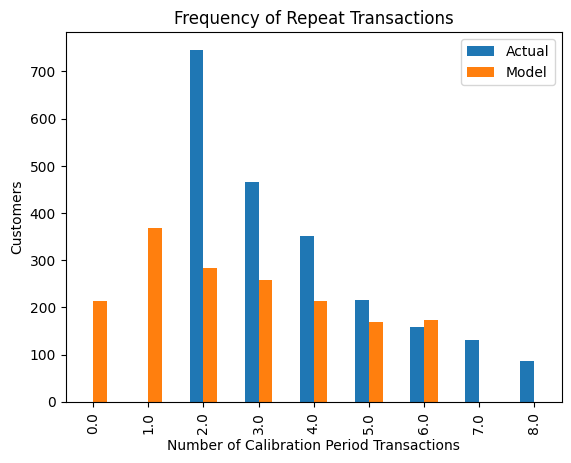

,recency,T,frequency,monetary_value,expected_purc_1_week,expected_purc_3_months
CustomerID,,,,,,
13854.0000,53.1429,53.4286,1398,1072.4458,21.4482,254.7845
12748.0000,53.1429,53.4286,209,154.7142,3.4108,40.5167
17841.0000,53.0000,53.4286,124,330.5453,2.0332,24.1523
13089.0000,52.2857,52.8571,97,605.8655,1.6101,19.1248
14606.0000,53.1429,53.4286,93,130.2545,1.5323,18.2017
15311.0000,53.2857,53.4286,91,667.5968,1.5004,17.8238
12971.0000,52.5714,53.2857,86,127.0498,1.4196,16.8635
13408.0000,53.0000,53.4286,62,453.5006,1.0296,12.2311
18102.0000,52.2857,52.5714,60,3587.9863,1.0117,12.0165


In [ ]:
####### BGNBD MODEL:

bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

plot_period_transactions(bgf)
plt.show()

cltv_df["expected_purc_3_months"] = bgf.predict(12,  # Nilai 12 mewakili 3 bulan (dalam bulan)
                                                cltv_df["frequency"],
                                                cltv_df["recency"],
                                                cltv_df["T"])
cltv_df.head()
cltv_df.sort_values(by="expected_purc_3_months", ascending=False).head(10)


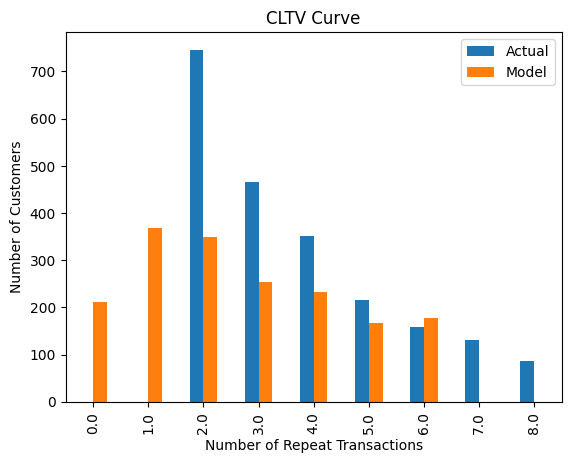

In [ ]:
from lifetimes.plotting import plot_period_transactions

plot_period_transactions(bgf)
plt.title('CLTV Curve')
plt.xlabel('Number of Repeat Transactions')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
###### GAMMA GAMMA MODEL:

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df["frequency"], cltv_df["monetary_value"])

cltv_df["exp_avg_profit"] = ggf.conditional_expected_average_profit(cltv_df["frequency"],
                                                                    cltv_df["monetary_value"])

cltv_df.sort_values("exp_avg_profit", ascending=False)



,recency,T,frequency,monetary_value,expected_purc_1_week,expected_purc_3_months,exp_avg_profit
CustomerID,,,,,,,
14088.0000,44.5714,46.1429,13,3866.4604,0.2668,3.1648,3918.2935
18102.0000,52.2857,52.5714,60,3587.9863,1.0117,12.0165,3598.3047
14096.0000,13.8571,14.5714,17,3167.3774,0.8096,9.4772,3199.7866
17511.0000,52.8571,53.4286,31,2921.9519,0.5274,6.2654,2938.2821
15749.0000,13.8571,47.5714,3,2521.4467,0.0272,0.3227,2675.1947
...,...,...,...,...,...,...,...
17988.0000,44.8571,46.7143,7,28.7314,0.1552,1.8420,29.9999
15516.0000,0.1429,6.7143,3,20.8100,0.2224,2.5757,23.3932
18037.0000,29.5714,51.8571,6,11.6700,0.0814,0.9667,12.6555


In [ ]:
###################
#  Finally! Calculation of CLTV with BG-NBD and GG model.
###################

# Ex: For 3 months of time prediction

cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["frequency"],
                                   cltv_df["recency"],
                                   cltv_df["T"],
                                   cltv_df["monetary_value"],
                                   time=3,
                                   freq="W",
                                   discount_rate=0.01)

cltv = cltv.reset_index()

cltv_final = cltv_df.merge(cltv, on="CustomerID", how="left")

In [ ]:
# Let's see the final table:

cltv_final.sort_values(by="clv", ascending=False).head(10)

###### Segmentation of Customers:

# 1. Scaling for better insight of dataframe:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

# 2. Segmentation:
cltv_final["Segment"] = pd.qcut(cltv_final["scaled_clv"], 4, ["D", "C", "B", "A"])
cltv_final.head()

cltv_final.groupby("Segment").agg(["count", "mean", "sum"])

CustomerID                          recency                        T                    frequency               monetary_value                      expected_purc_1_week                 expected_purc_3_months                  exp_avg_profit                        clv                        scaled_clv              
             count       mean           sum   count    mean        sum count    mean        sum     count    mean   sum          count     mean         sum                count   mean      sum                  count   mean       sum          count     mean         sum count      mean          sum      count   mean    sum
Segment                                                                                                                                                                                                                                                                                                                           
D              643 15699.0762 10094506.0000     643 22.0593 14184.1429   643 40.7207 26183.4286       643  2.9782  1915            643 182.4774 117332.9424                  643 0.0656  42.1787                    643 0.7754  498.5934            643 197.7422 127148.2580   643  132.3281   85086.9979        643 0.0005 0.2926
C              642 15532.1604  9971647.0000     642 31.0407 19928.1429   642 38.3569 24625.1429       642  4.0607  2607            642 262.8343 168739.6229                  642 0.1184  76.0057                    642 1.3984  897.7678            642 280.2991 179952.0479   642  359.1205  230555.3549        642 0.0012 0.7929
B              642 15597.3832 10013520.0000     642 30.2292 19407.1429   642 35.4161 22737.1429       642  5.4673  3510            642 356.3896 228802.1517                  642 0.1630 104.6762                    642 1.9218 1233.8065            642 375.0150 240759.6431   642  657.1313  421878.3013        642 0.0023 1.4509
A              643 15386.1571  9893299.0000     643 30.8782 19854.7143   643 33.8196 21746.0000       643 13.4323  8637            643 577.7451 371490.0839                  643 0.3221 207.1069                    643 3.7991 2442.7947            643 599.6086 385548.3391   643 2489.6119 1600820.4593        643 0.0086 5.5056

In [ ]:
cltv_final.sort_values(by="clv", ascending=False).head(10)


,CustomerID,recency,T,frequency,monetary_value,expected_purc_1_week,expected_purc_3_months,exp_avg_profit,clv,scaled_clv,Segment
475,13854.0000,53.1429,53.4286,1398,1072.4458,21.4482,254.7845,1072.5797,290761.3272,1.0000,A
2486,18102.0000,52.2857,52.5714,60,3587.9863,1.0117,12.0165,3598.3047,46005.1275,0.1582,A
589,14096.0000,13.8571,14.5714,17,3167.3774,0.8096,9.4772,3199.7866,32231.1084,0.1109,A
2184,17450.0000,51.2857,52.5714,46,2629.5299,0.7787,9.2487,2639.4240,25972.9289,0.0893,A
2213,17511.0000,52.8571,53.4286,31,2921.9519,0.5274,6.2654,2938.2821,19587.5063,0.0674,A
1485,16000.0000,0.0000,0.4286,3,2055.7867,0.5234,5.9530,2181.3853,13779.1832,0.0474,A
406,13694.0000,52.7143,53.4286,50,1267.3626,0.8346,9.9138,1271.7874,13414.8853,0.0461,A
1804,16684.0000,50.4286,51.2857,28,2120.0470,0.4957,5.8860,2133.2097,13358.9773,0.0459,A
587,14088.0000,44.5714,46.1429,13,3866.4604,0.2668,3.1648,3918.2935,13192.8144,0.0454,A
1173,15311.0000,53.2857,53.4286,91,667.5968,1.5004,17.8238,668.8950,12685.0684,0.0436,A
